Importing the Essential Libraries and loading data :

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Now, we check the data set information :

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

Check the missing values :

In [5]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Exploratory Data Analysis :

In [7]:
df.describe().round(1)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0
mean,54.4,0.7,3.2,131.3,249.7,0.1,1.0,149.7,0.3,1.0,1.6,0.7,4.7
std,9.1,0.5,1.0,17.9,51.7,0.4,1.0,23.2,0.5,1.1,0.6,0.9,1.9
min,29.0,0.0,1.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,1.0,0.0,3.0
25%,48.0,0.0,3.0,120.0,213.0,0.0,0.0,133.0,0.0,0.0,1.0,0.0,3.0
50%,55.0,1.0,3.0,130.0,245.0,0.0,2.0,153.5,0.0,0.8,2.0,0.0,3.0
75%,61.0,1.0,4.0,140.0,280.0,0.0,2.0,166.0,1.0,1.6,2.0,1.0,7.0
max,77.0,1.0,4.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,3.0,3.0,7.0


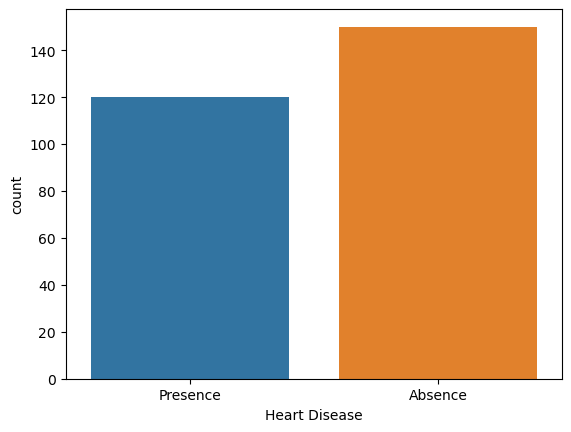

In [9]:
sns.countplot(x = 'Heart Disease', data = df);
plt.show()

Preparing data for prediction :

Transformation of the variable : changing the absence and presence in 0 or 1

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['Heart Disease'])
df['Heart Disease'] = encoder.transform(df['Heart Disease'])

In [12]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


Separation of the data into a DataFrame feats containing the explanatory variables and target :

In [13]:
X = df.drop(columns = "Heart Disease", axis=1)
Y = df['Heart Disease']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

Modelisation : Logistic Regression

In [16]:
model = LogisticRegression()
model.fit(X_train, Y_train)
print("Accuracy du modèle:", model.score(X_test, Y_test))

Accuracy du modèle: 0.7592592592592593


C:\Users\beaux\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
predictions = model.predict(X_test)

pd.crosstab(Y_test, predictions, rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,25,7
1,6,16


In [18]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.70      0.73      0.71        22

    accuracy                           0.76        54
   macro avg       0.75      0.75      0.75        54
weighted avg       0.76      0.76      0.76        54



Modelisation : SVM

In [19]:
from sklearn.svm import SVC

svm_clf = SVC()

svm_clf.fit(X_train, Y_train)

print("Accuracy du modèle:", svm_clf.score(X_test, Y_test))

Accuracy du modèle: 0.5555555555555556


In [20]:
predictions = svm_clf.predict(X_test)

pd.crosstab(Y_test, predictions, rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,23,9
1,15,7


In [21]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66        32
           1       0.44      0.32      0.37        22

    accuracy                           0.56        54
   macro avg       0.52      0.52      0.51        54
weighted avg       0.54      0.56      0.54        54



Modelisation : KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)

print("Accuracy du modèle:", knn.score(X_test, Y_test))

Accuracy du modèle: 0.4444444444444444


In [24]:
predictions = knn.predict(X_test)

pd.crosstab(Y_test, predictions, rownames=['True'], colnames=['Predicted'])

Predicted,0,1
True,,
0,18,14
1,16,6


In [25]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.53      0.56      0.55        32
           1       0.30      0.27      0.29        22

    accuracy                           0.44        54
   macro avg       0.41      0.42      0.42        54
weighted avg       0.44      0.44      0.44        54

